# Segmentasi Teks - Part-of-Speech (POS) Tagging
Part-of-Speech (POS) Tagging adalah proses menganotasi setiap kata dalam teks dengan kategori gramatikalnya. Mengapa ini penting? Karena arti sebuah kata bisa berubah tergantung pada perannya dalam kalimat. Misalnya, kata "book" bisa menjadi kata benda ("I read a book") atau kata kerja ("Please book a flight").

Dengan memahami peran setiap kata, mesin dapat mulai memahami struktur gramatikal sebuah kalimat. Kita akan kembali menggunakan spaCy karena ia melakukan POS tagging secara otomatis saat memproses teks.

## 1. Setting spaCy

In [ ]:
# Import library
import spacy
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Muat model bahasa Inggris yang telah dilatih
nlp = spacy.load("en_core_web_sm")

print("spaCy dan model berhasil dimuat!")

spaCy dan model berhasil dimuat!


## 2. Melakukan POS Tagging pada Kalimat
Saat kita membuat objek Doc di spaCy, setiap Token di dalamnya sudah memiliki informasi POS tag. Mari kita lihat atribut-atribut utamanya.


*   token.text: Teks asli dari token/kata.
*   token.pos_: Tag POS yang sederhana dan universal (misalnya, NOUN, VERB, ADJ).
*   token.tag_: Tag POS yang lebih detail dan spesifik untuk bahasa tertentu (misalnya, NNP untuk kata benda tunggal yang merupakan nama diri).
*   spacy.explain(): Fungsi untuk mendapatkan penjelasan dari sebuah tag.



In [ ]:
# Contoh kalimat
text = "She is running quickly to the big green park."

# Proses teks dengan model nlp
doc = nlp(text)

# Iterasi melalui setiap token dan cetak informasi POS-nya
print(f"{'Text':<15} {'POS (Coarse)':<15} {'POS (Fine)':<15} {'Explanation'}")
print("-" * 60)

for token in doc:
    print(f"{token.text:<15} {token.pos_:<15} {token.tag_:<15} {spacy.explain(token.pos_)}")

Text            POS (Coarse)    POS (Fine)      Explanation
------------------------------------------------------------
She             PRON            PRP             pronoun
is              AUX             VBZ             auxiliary
running         VERB            VBG             verb
quickly         ADV             RB              adverb
to              ADP             IN              adposition
the             DET             DT              determiner
big             ADJ             JJ              adjective
green           PROPN           NNP             proper noun
park            NOUN            NN              noun
.               PUNCT           .               punctuation


## 3. Visualisasi Struktur Kalimat (Dependency Parsing)
POS Tagging adalah fondasi untuk memahami bagaimana kata-kata saling berhubungan dalam sebuah kalimat. Hubungan ini disebut dependency. spaCy dapat memvisualisasikan pohon dependensi ini dengan displaCy, yang secara implisit menunjukkan peran setiap kata (POS tag) dalam struktur kalimat.

In [ ]:
from spacy import displacy

# Gunakan displaCy untuk merender hasil parsing
# style='dep' berarti kita ingin visualisasi dependensi
displacy.render(doc, style="dep", jupyter=True, options={'distance': 90})

## 4. Menganalisis Frekuensi POS Tag
Kita bisa menganalisis komposisi sebuah teks dengan menghitung frekuensi setiap jenis POS tag. Ini bisa memberi kita gambaran tentang gaya penulisan. Teks deskriptif mungkin memiliki banyak kata sifat (ADJ), sementara teks instruksional mungkin memiliki banyak kata kerja (VERB).

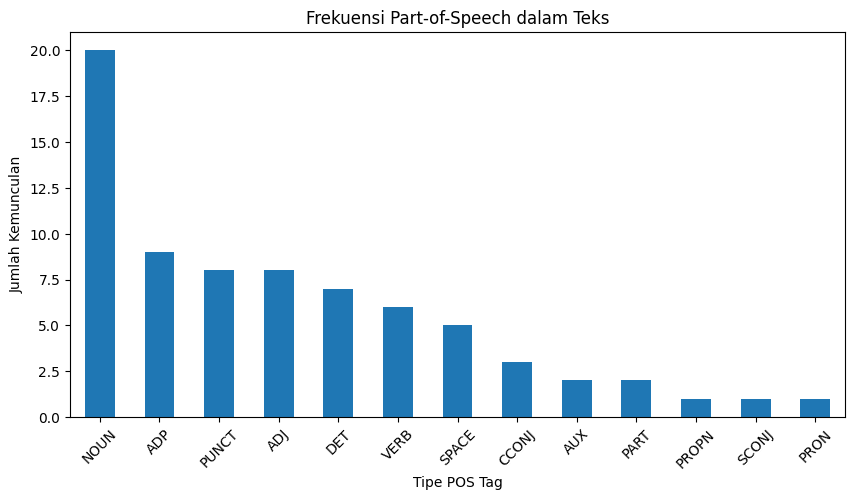

In [ ]:
long_text = """
Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence
concerned with the interactions between computers and human language, in particular how to program computers
to process and analyze large amounts of natural language data. The goal is a computer capable of
understanding the contents of documents, including the contextual nuances of the language within them.
"""

# Proses teks
long_doc = nlp(long_text)

# Hitung frekuensi setiap POS tag
pos_counts = Counter(token.pos_ for token in long_doc)

# Ubah ke DataFrame untuk visualisasi yang lebih mudah
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS_Tag', 'Frequency'])
pos_df = pos_df.sort_values(by='Frequency', ascending=False)

# Tampilkan dalam bentuk bar chart
pos_df.plot.bar(x='POS_Tag', y='Frequency', legend=False, figsize=(10, 5))
plt.title('Frekuensi Part-of-Speech dalam Teks')
plt.ylabel('Jumlah Kemunculan')
plt.xlabel('Tipe POS Tag')
plt.xticks(rotation=45)
plt.show()

## 7. Aplikasi Praktis: Ekstraksi Informasi Sederhana
Dengan POS tagging, kita bisa dengan mudah mengekstrak tipe kata tertentu. Misalnya, mari kita ekstrak semua kata benda (nouns) dan kata sifat (adjectives) dari sebuah ulasan produk untuk menemukan fitur utama dan opini tentangnya.

In [ ]:
review_text = "The new Pixel 8 has a brilliant camera and a very fast processor, but the battery life is poor."

review_doc = nlp(review_text)

# Ekstrak semua kata benda (fitur produk)
nouns = [token.text for token in review_doc if token.pos_ == 'NOUN']
# Ekstrak semua kata sifat (opini)
adjectives = [token.text for token in review_doc if token.pos_ == 'ADJ']

print("Fitur Produk yang Disebutkan (Nouns):", nouns)
print("Kata-kata Opini (Adjectives):", adjectives)

Fitur Produk yang Disebutkan (Nouns): ['camera', 'processor', 'battery', 'life']
Kata-kata Opini (Adjectives): ['new', 'brilliant', 'fast', 'poor']
